# Layers

In [1]:
# setup
options(warn = -1)
options(repr.plot.width = 10, repr.plot.height = 8)

In [2]:
# library
suppressMessages(library(tidyverse))
suppressMessages(library(patchwork))

In [3]:
# load the data
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


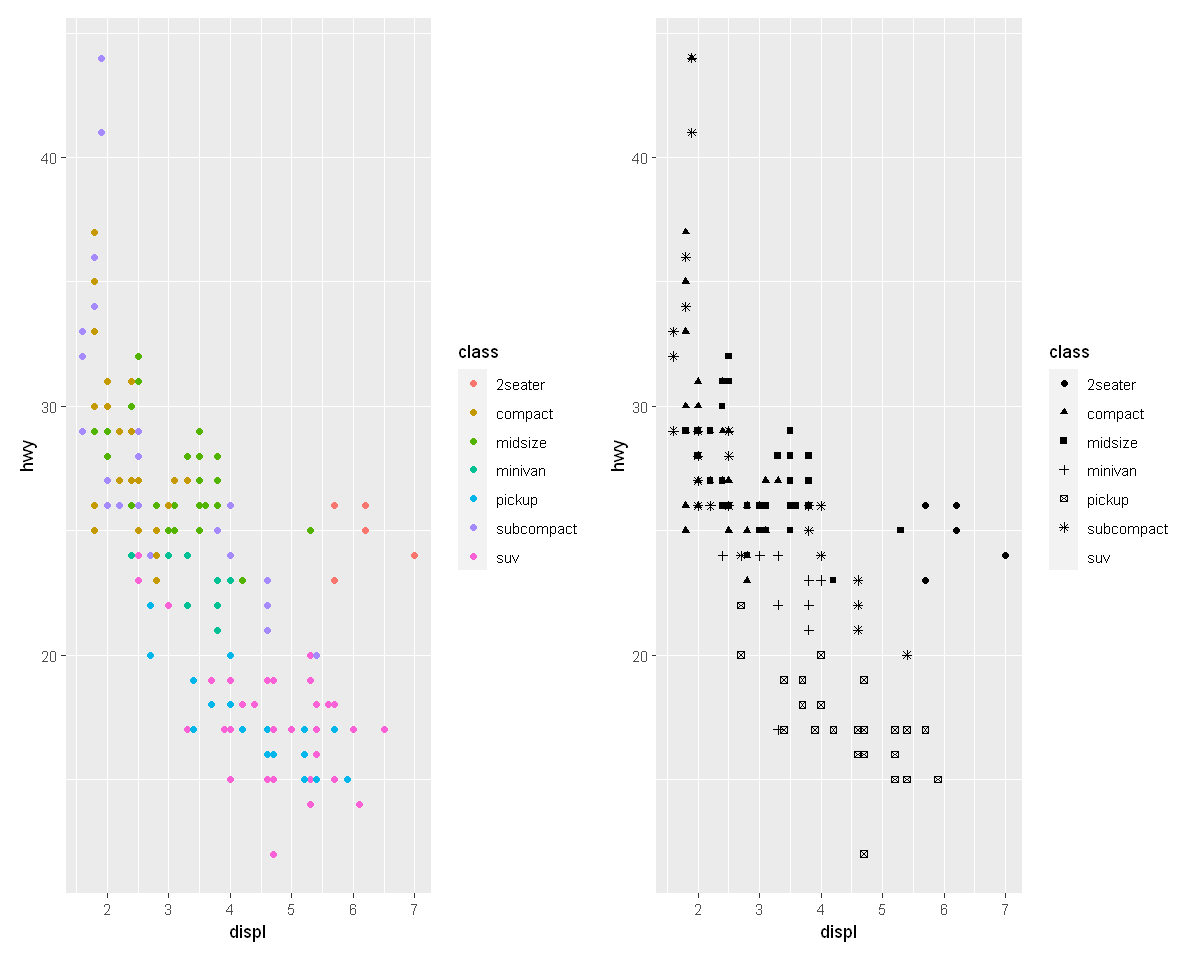

In [4]:
# visualize the data
p1 = ggplot(mpg, aes(x = displ, y = hwy, color = class)) +
  geom_point()

p2 = ggplot(mpg, aes(x = displ, y = hwy, shape = class)) +
  geom_point()

p1 + p2

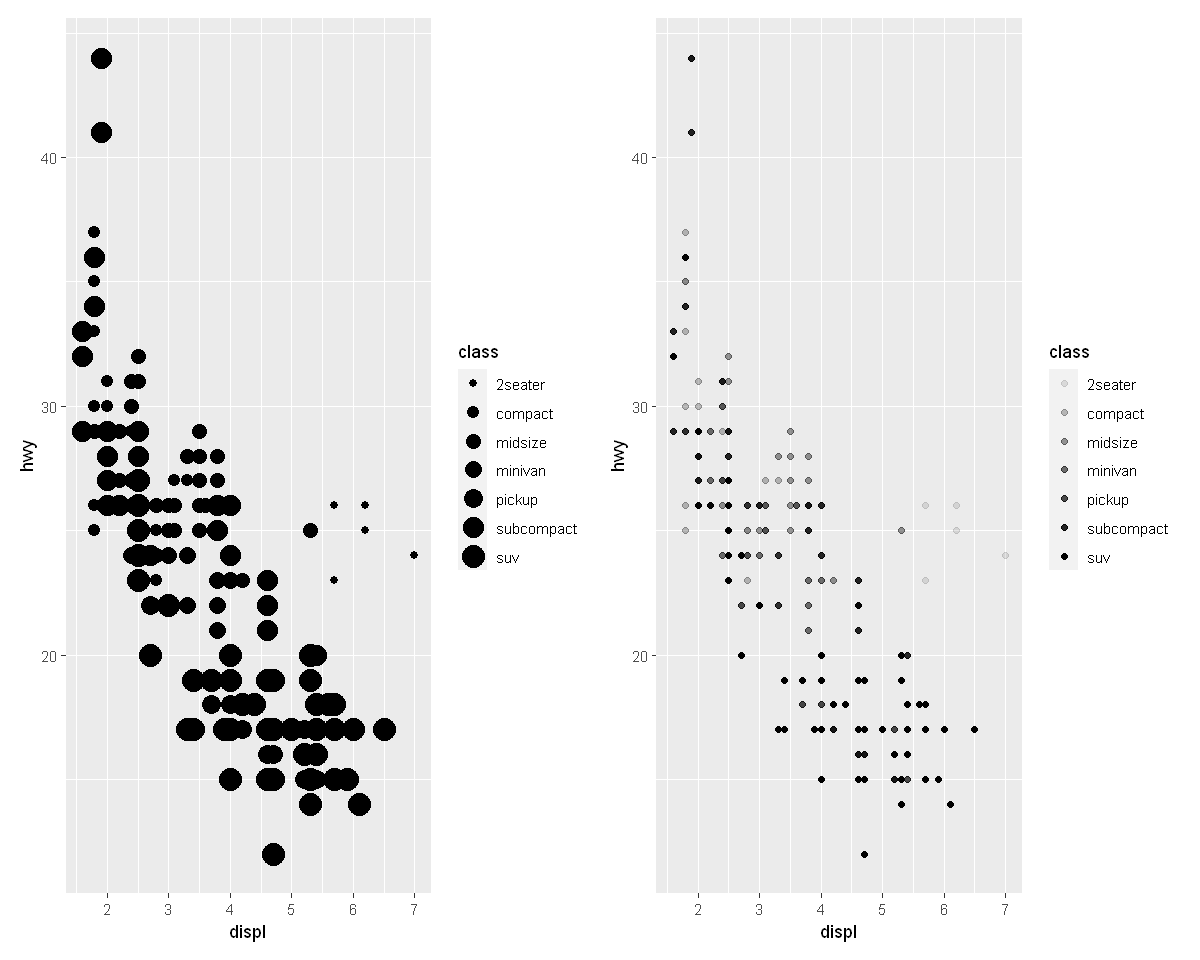

In [5]:
p1 = ggplot(mpg, aes(x = displ, y = hwy, size = class)) +
  geom_point()

p2 = ggplot(mpg, aes(x = displ, y = hwy, alpha = class)) +
  geom_point()  

p1 + p2

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


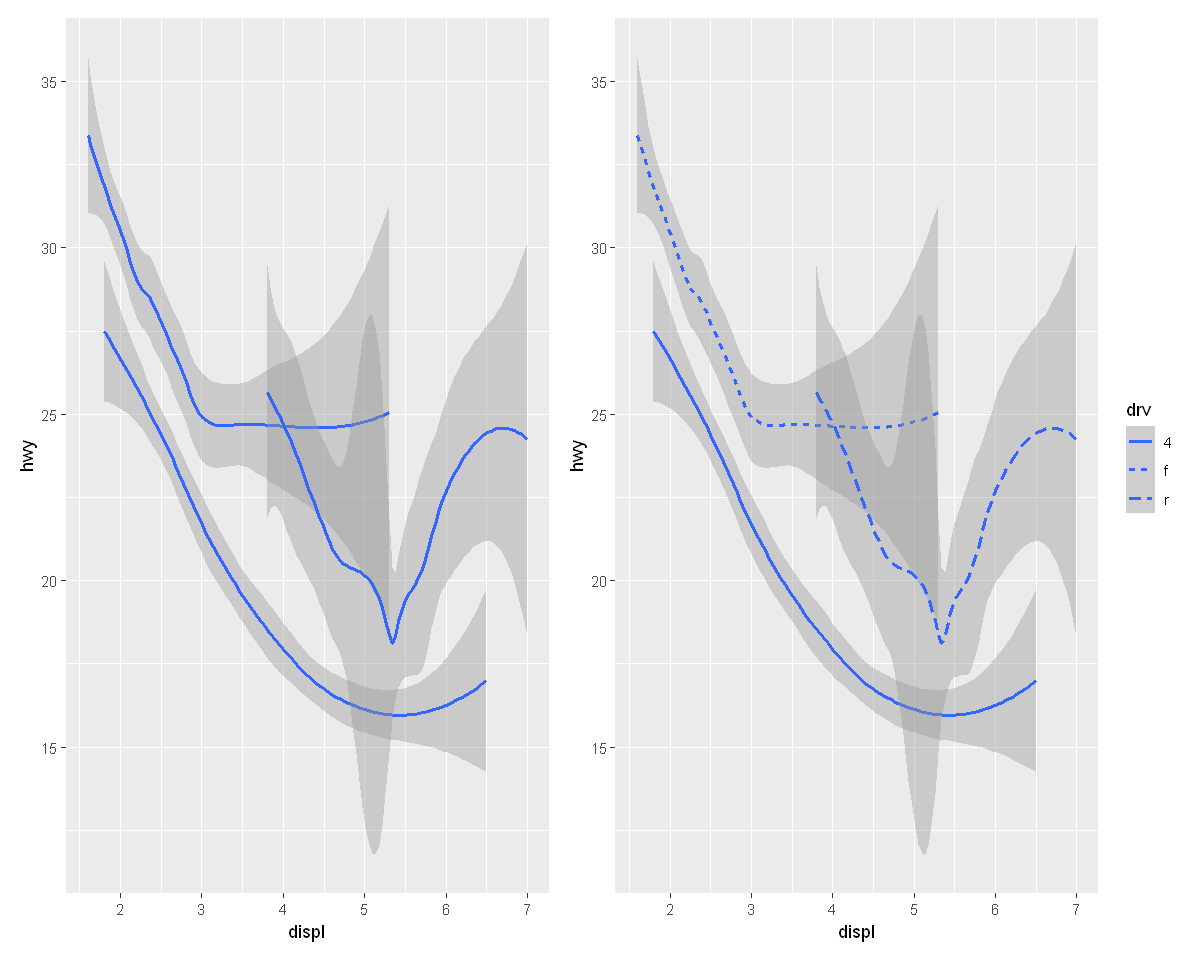

In [6]:
p1 = ggplot(mpg, aes(x = displ, y = hwy, shape = drv)) +
  geom_smooth()

p2 = ggplot(mpg, aes(x = displ, y = hwy, linetype = drv)) +
  geom_smooth()

p1 + p2

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


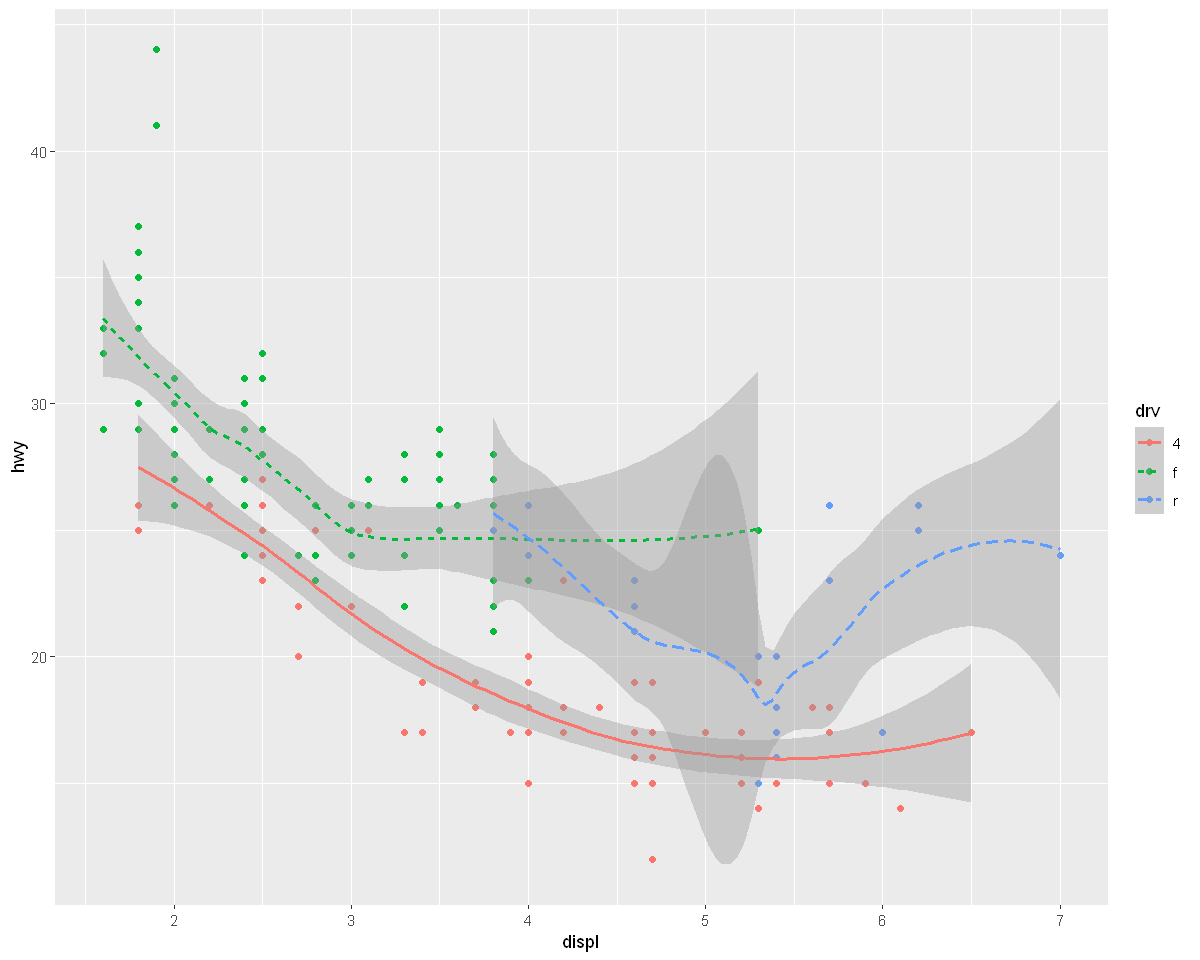

In [7]:
ggplot(mpg, aes(x = displ, y = hwy, color = drv)) +
  geom_point() +
  geom_smooth(aes(linetype = drv))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


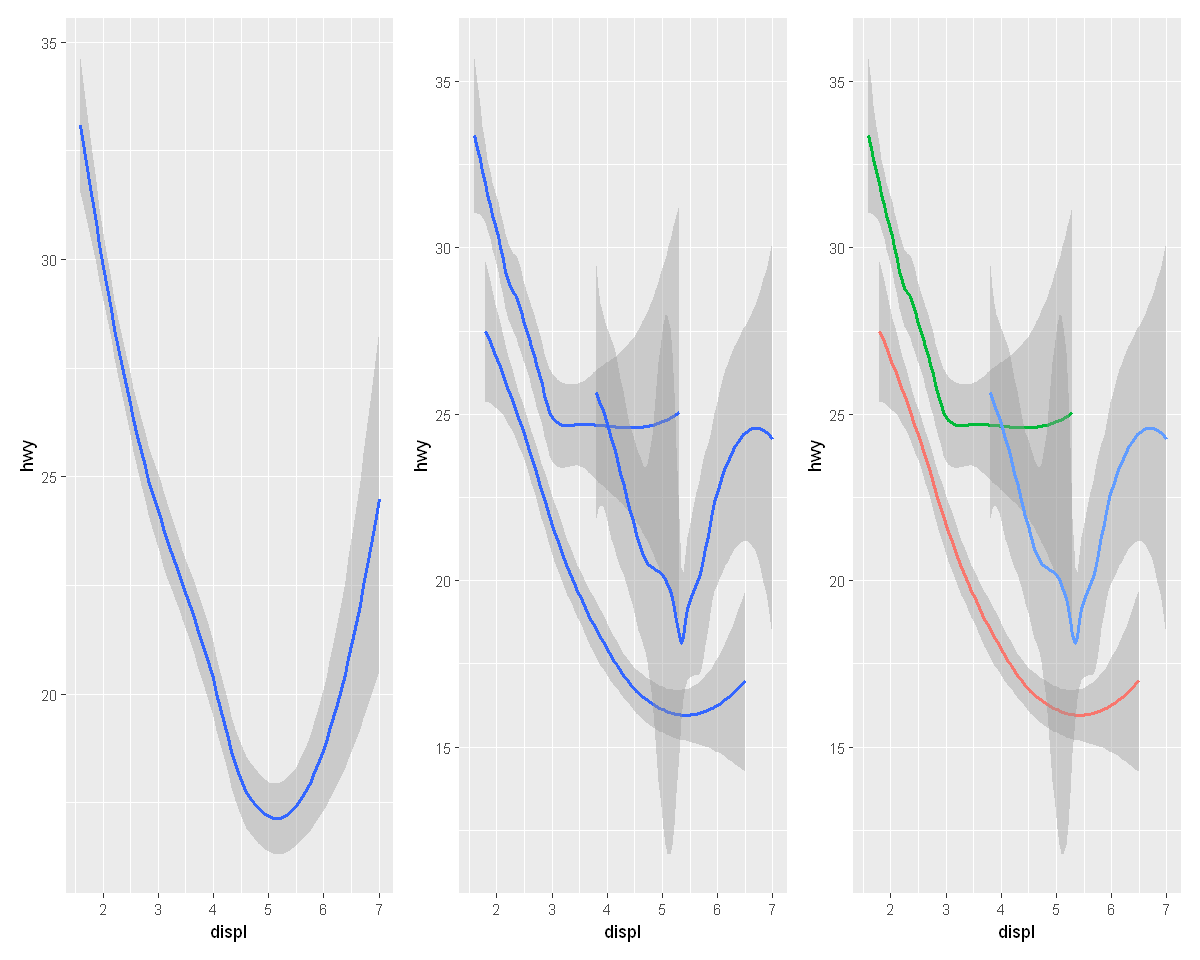

In [8]:
p1 = ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_smooth()

p2 = ggplot(mpg, aes(x = displ, y = hwy)) +
geom_smooth(aes(group = drv))

p3 = ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_smooth(aes(color = drv), show.legend = FALSE)

p1 + p2 + p3

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


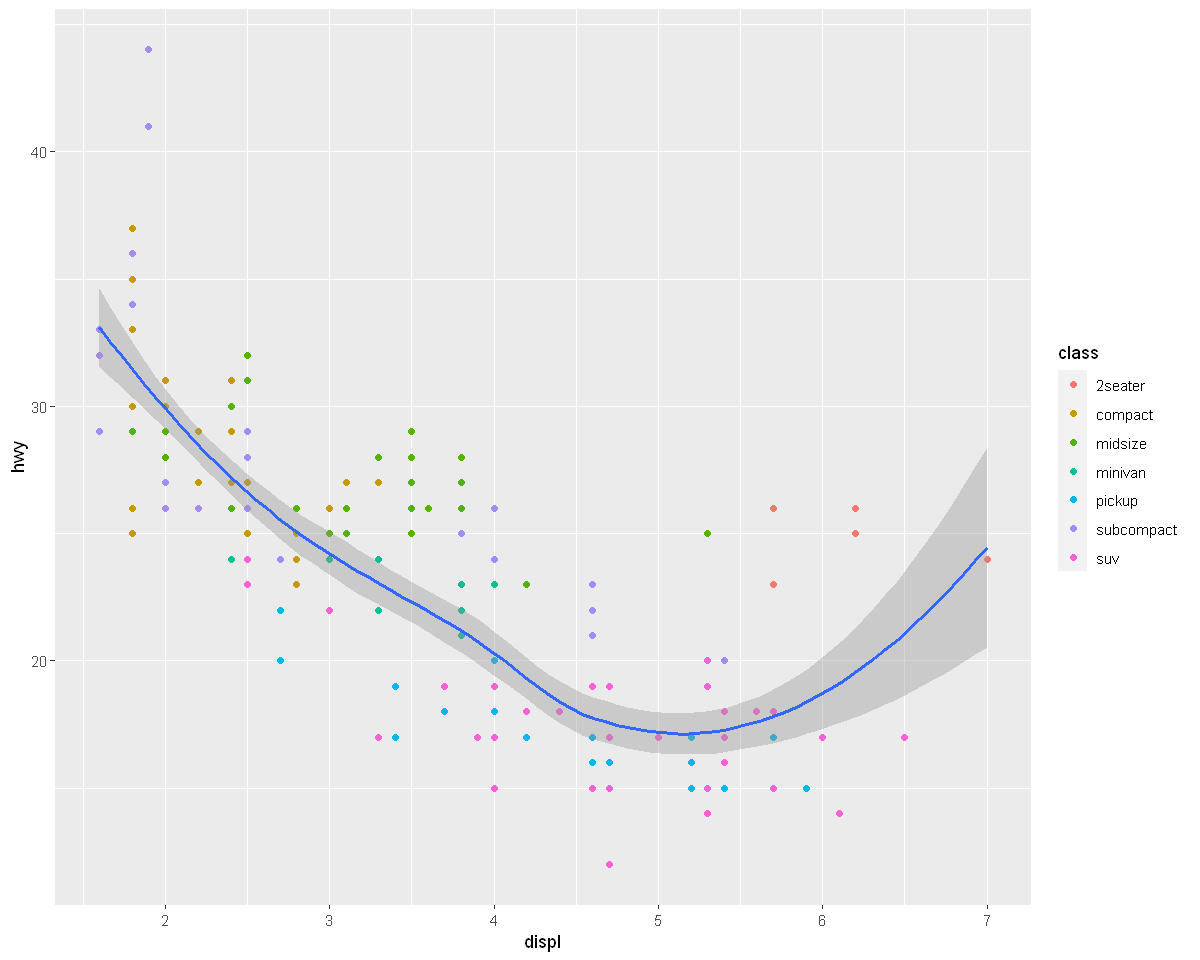

In [9]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point(aes(color = class)) +
    geom_smooth()

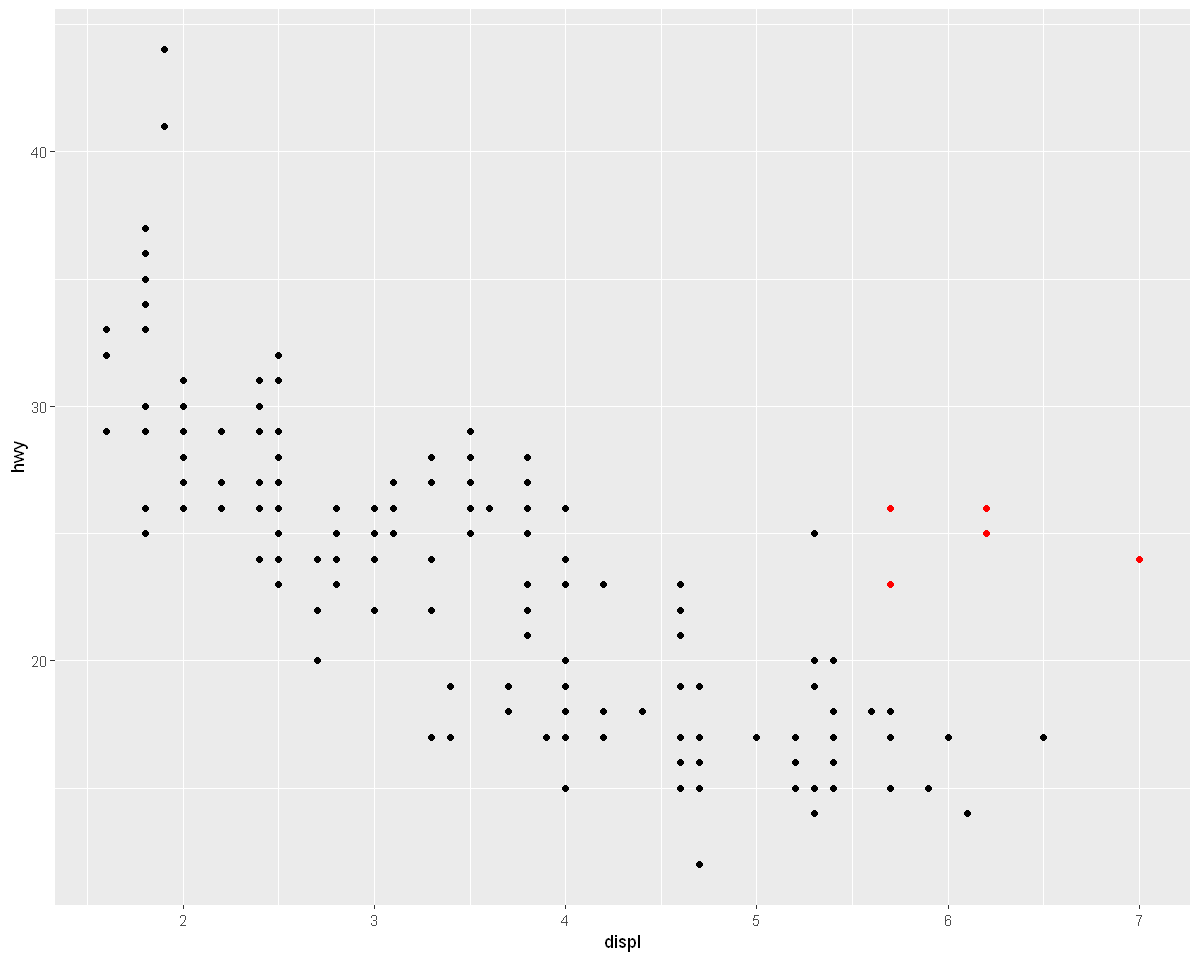

In [18]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_point(
        data = mpg %>% filter(class == "2seater"),
        color = "red"
    ) +
    geom_point(
        data = mpg %>% filter(class == "2seater"),
        color = "red", shape = "circle open"
    )

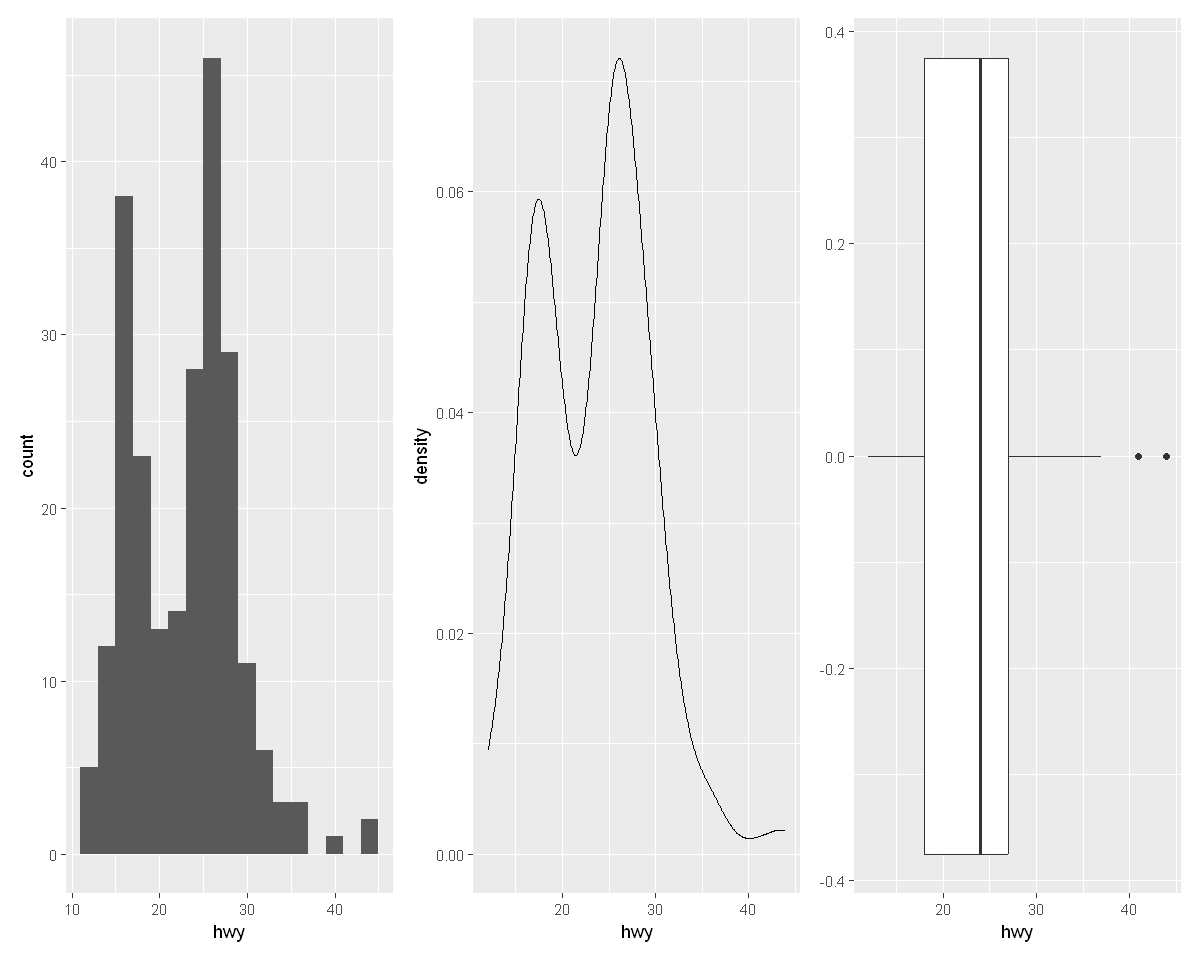

In [10]:
# mix
p1 = ggplot(mpg, aes(x = hwy)) +
    geom_histogram(binwidth = 2)

p2 = ggplot(mpg, aes(x = hwy)) +
    geom_density()

p3 = ggplot(mpg, aes(x = hwy)) +
    geom_boxplot()

p1 + p2 + p3

Picking joint bandwidth of 1.28



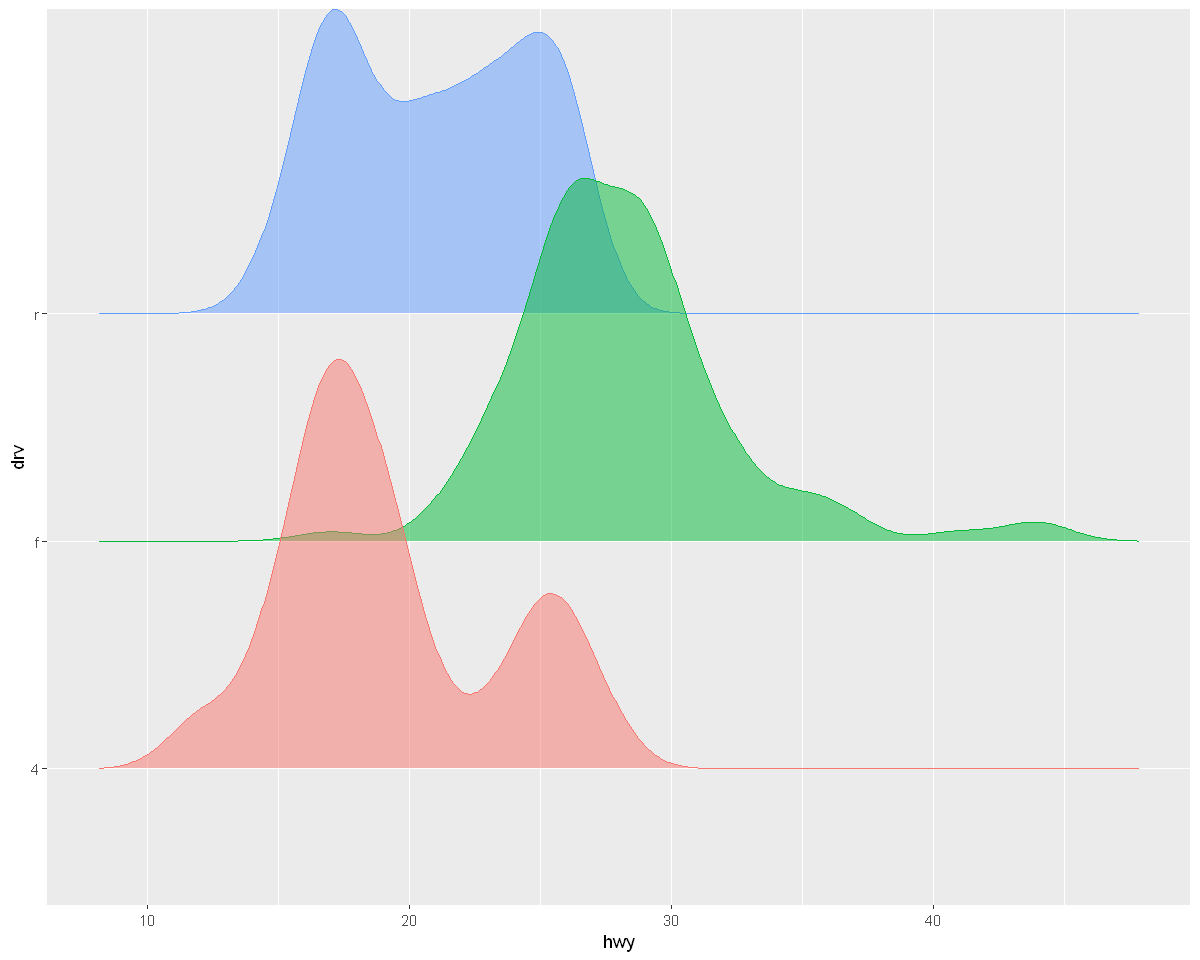

In [11]:
suppressMessages(library(ggridges))

ggplot(mpg, aes(x = hwy, y = drv, fill = drv, color = drv)) +
    geom_density_ridges(alpha = 1/2, show.legend = FALSE)

## Facets

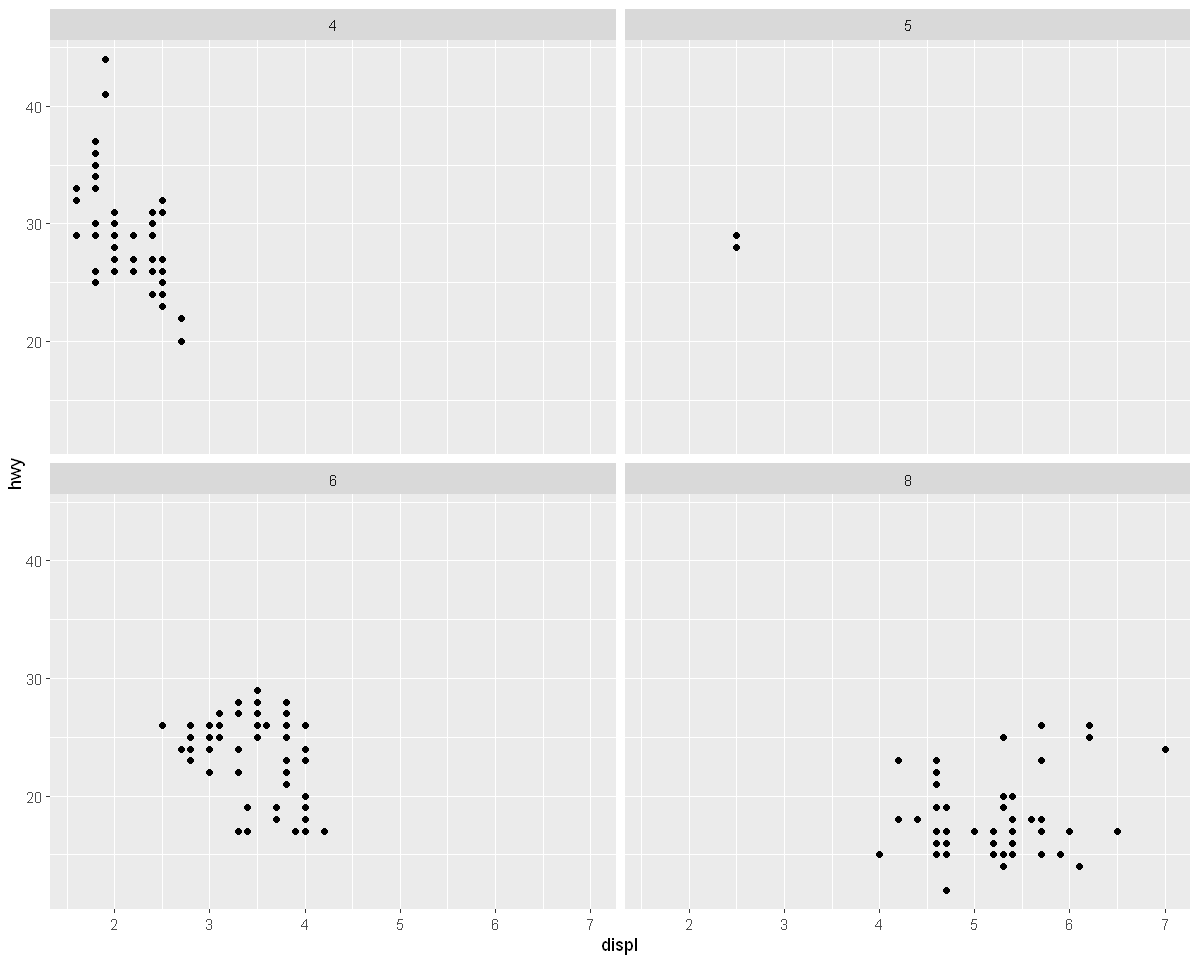

In [13]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    facet_wrap(~cyl)

- `facet_wrap` splits plot into subplots that each display one subset of the data based on the categorical variable
- `facet_grid` shows plot with the combination of two variables

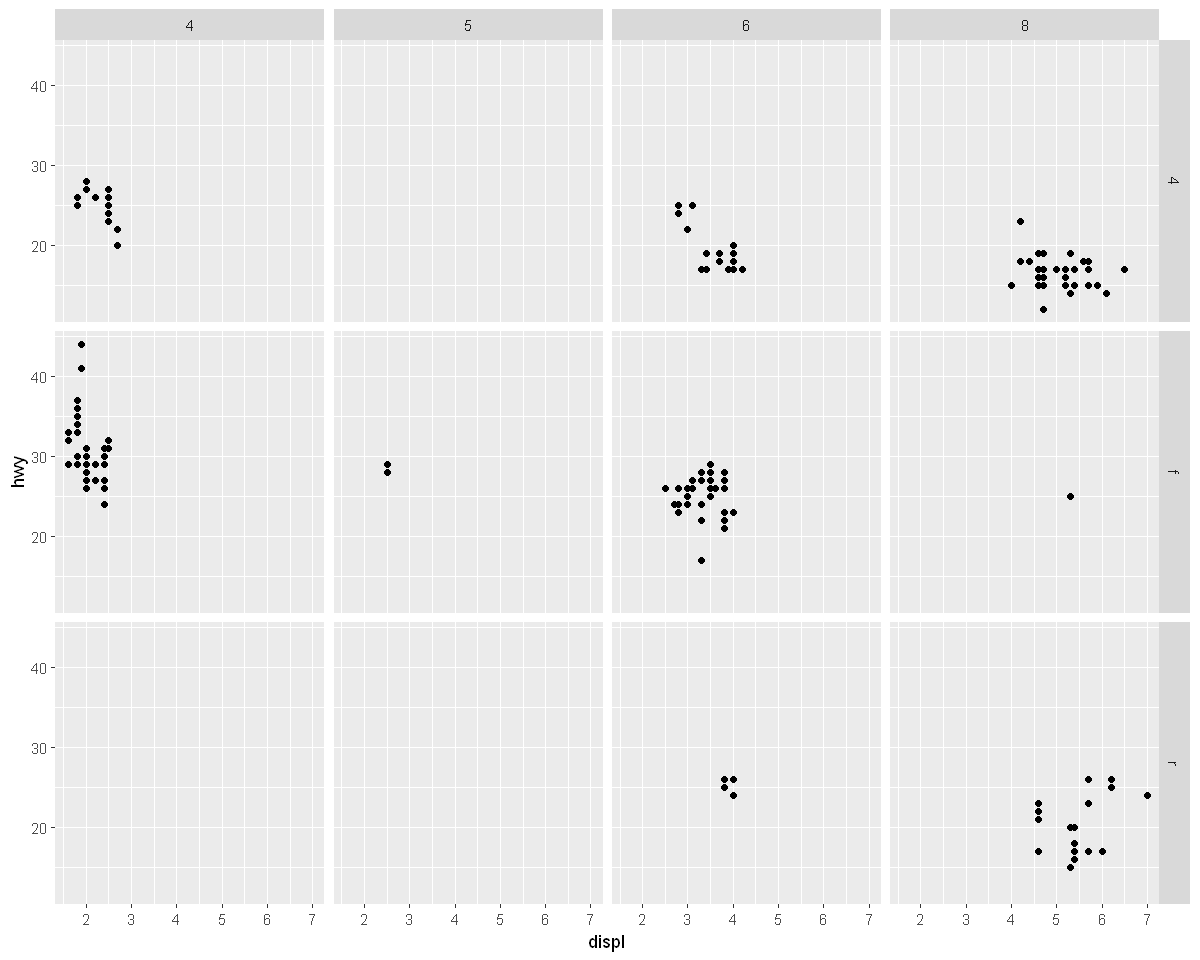

In [15]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    facet_grid(drv ~ cyl)

We can see the above plot, the y-axis scales is fixed. Let's change the y-axis to allow different scaling based on the data

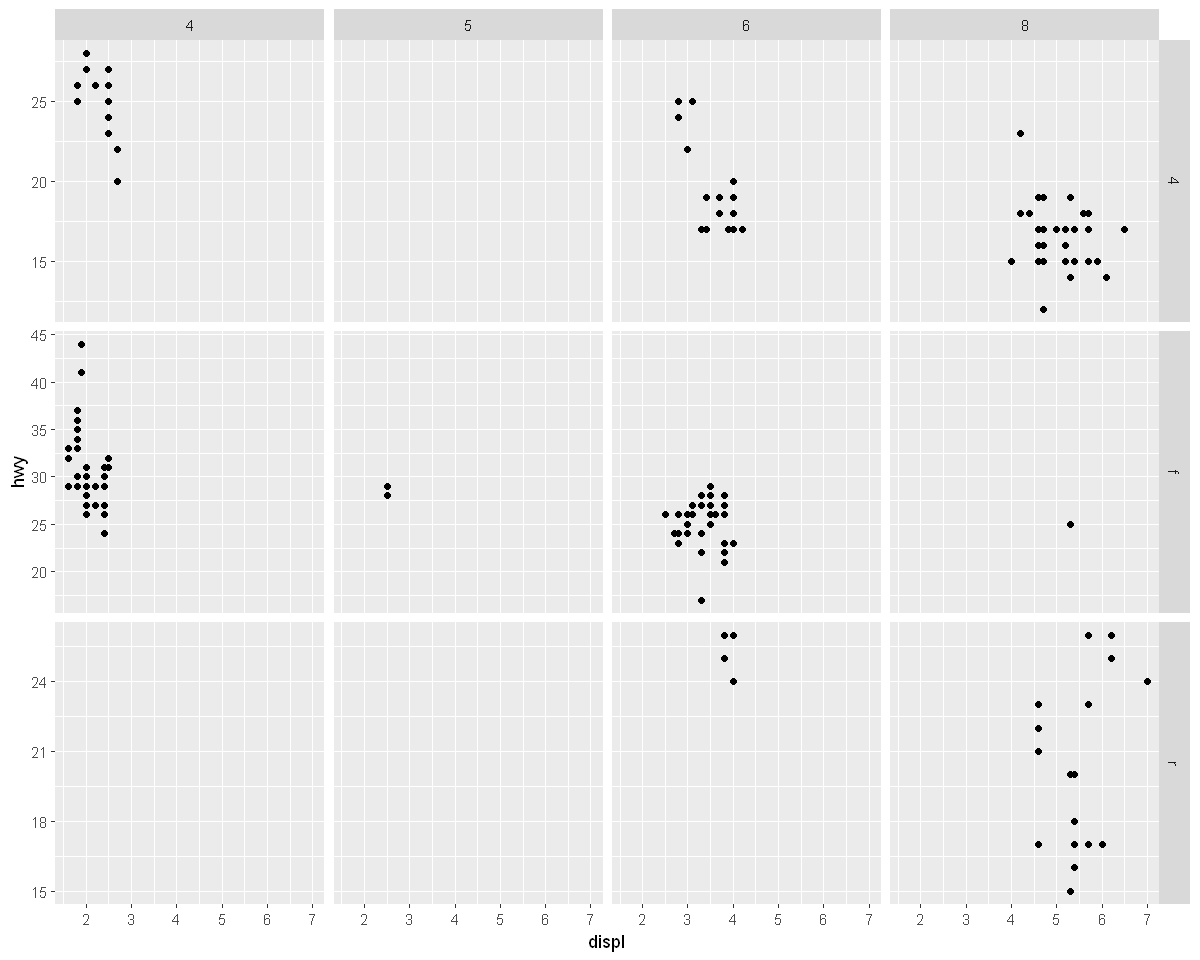

In [16]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    facet_grid(drv ~ cyl, scales = "free_y")

## Statistical Transformations

In [21]:
# preview the diamonds dataset
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


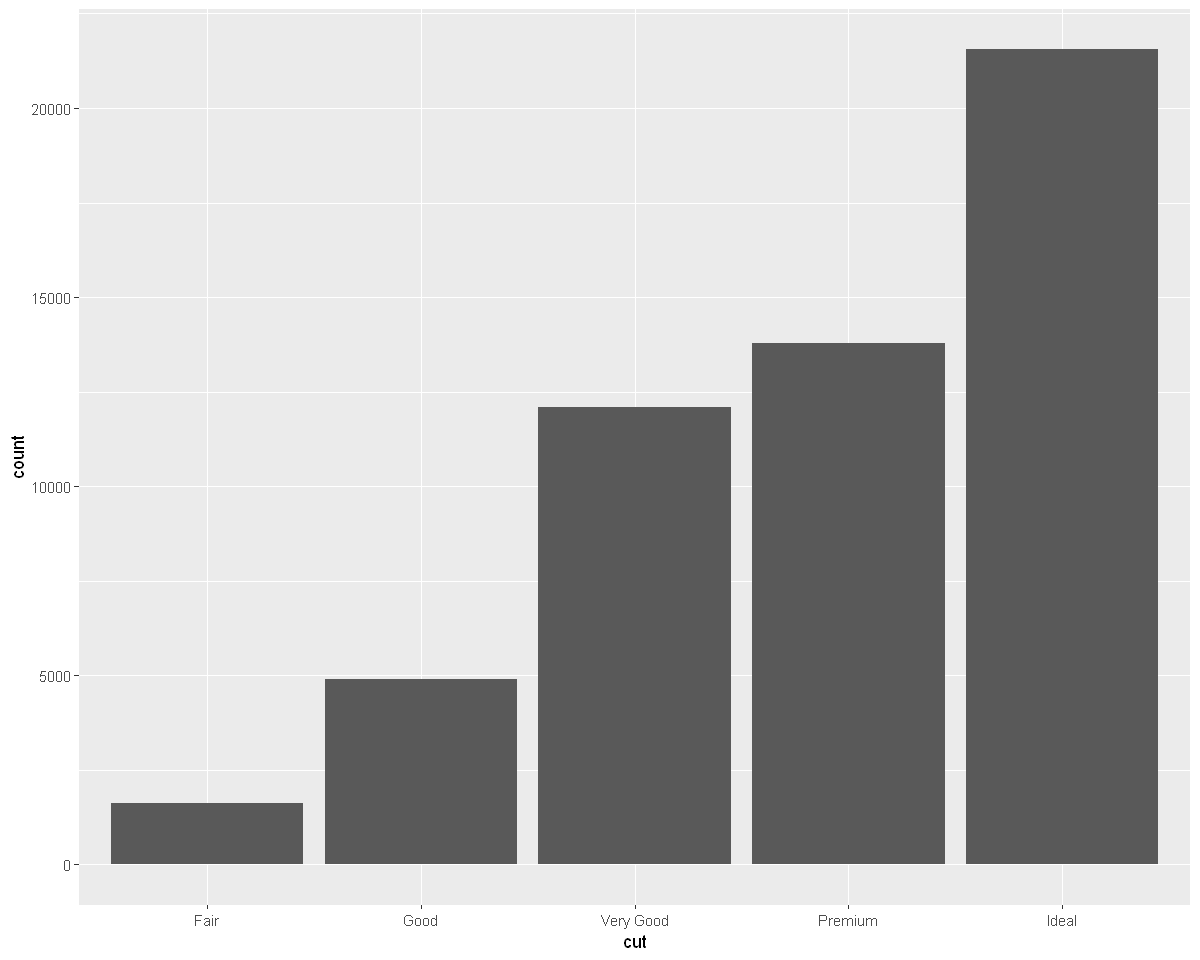

In [18]:
ggplot(diamonds, aes(x = cut)) +
    geom_bar()

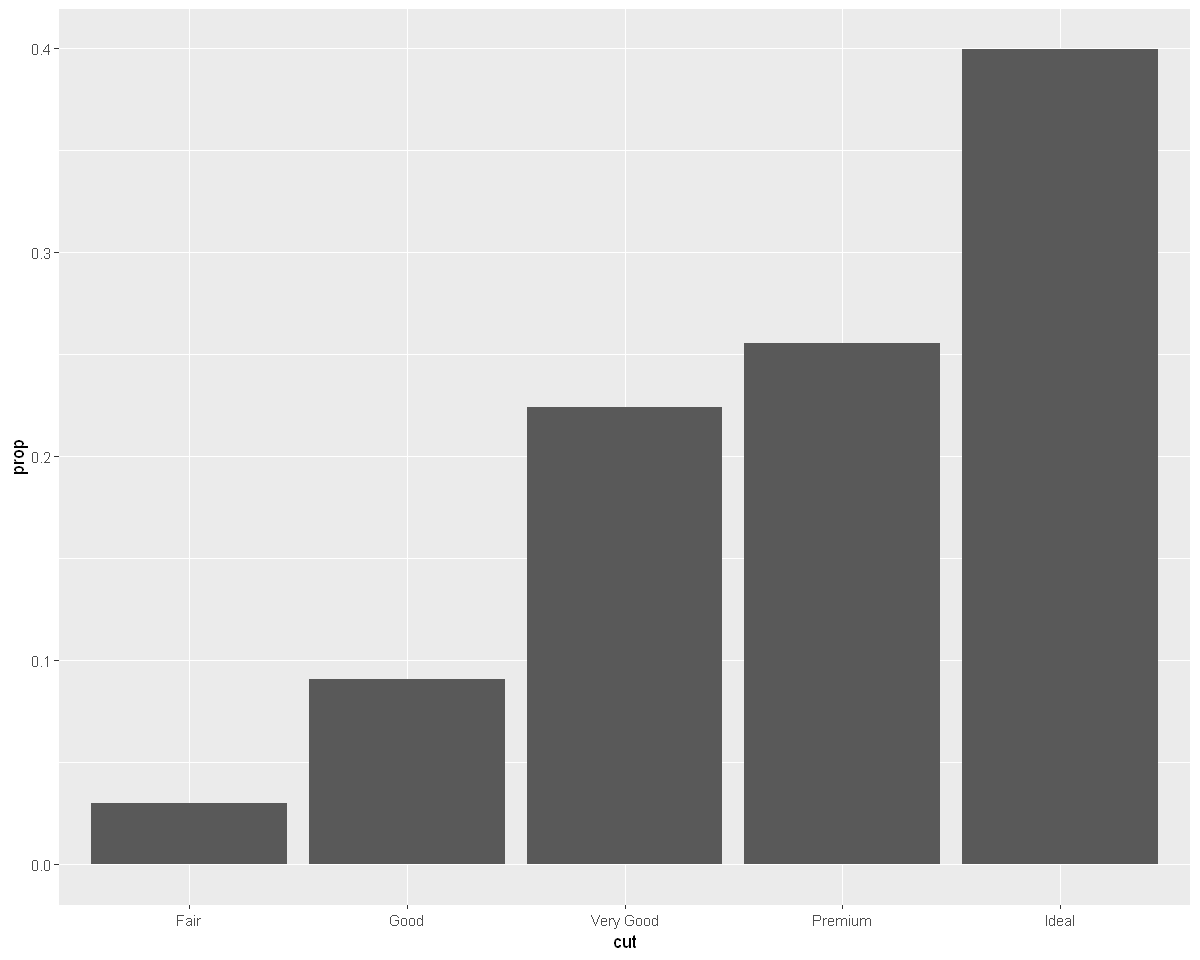

In [20]:
# let's display in terms of proportion rather than count
ggplot(diamonds, aes(x = cut, y = after_stat(prop), group = 1)) +
    geom_bar()

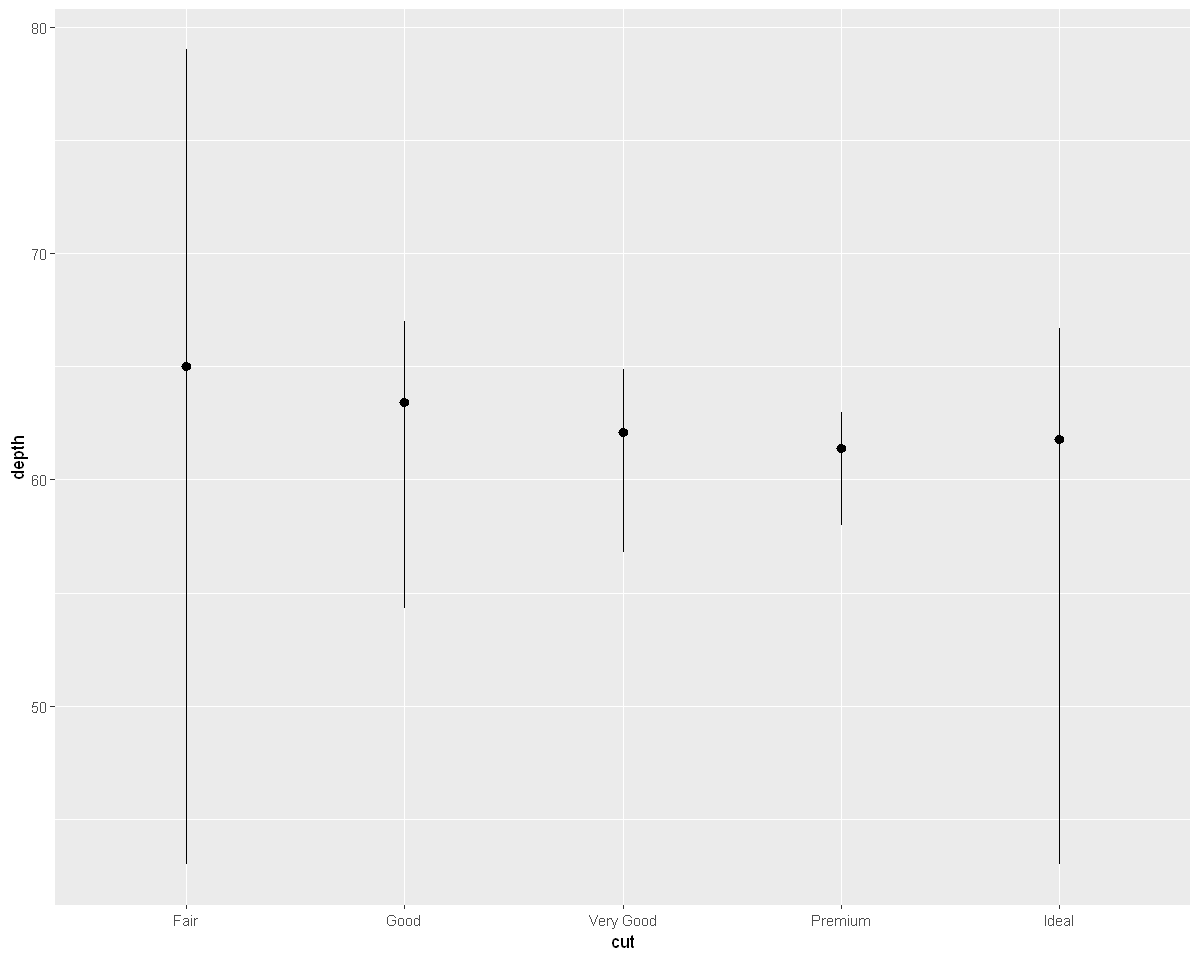

In [22]:
ggplot(diamonds) +
    stat_summary(
        aes(x = cut, y = depth),
        fun.min = min,
        fun.max = max,
        fun = median
    )

## Position Adjustments

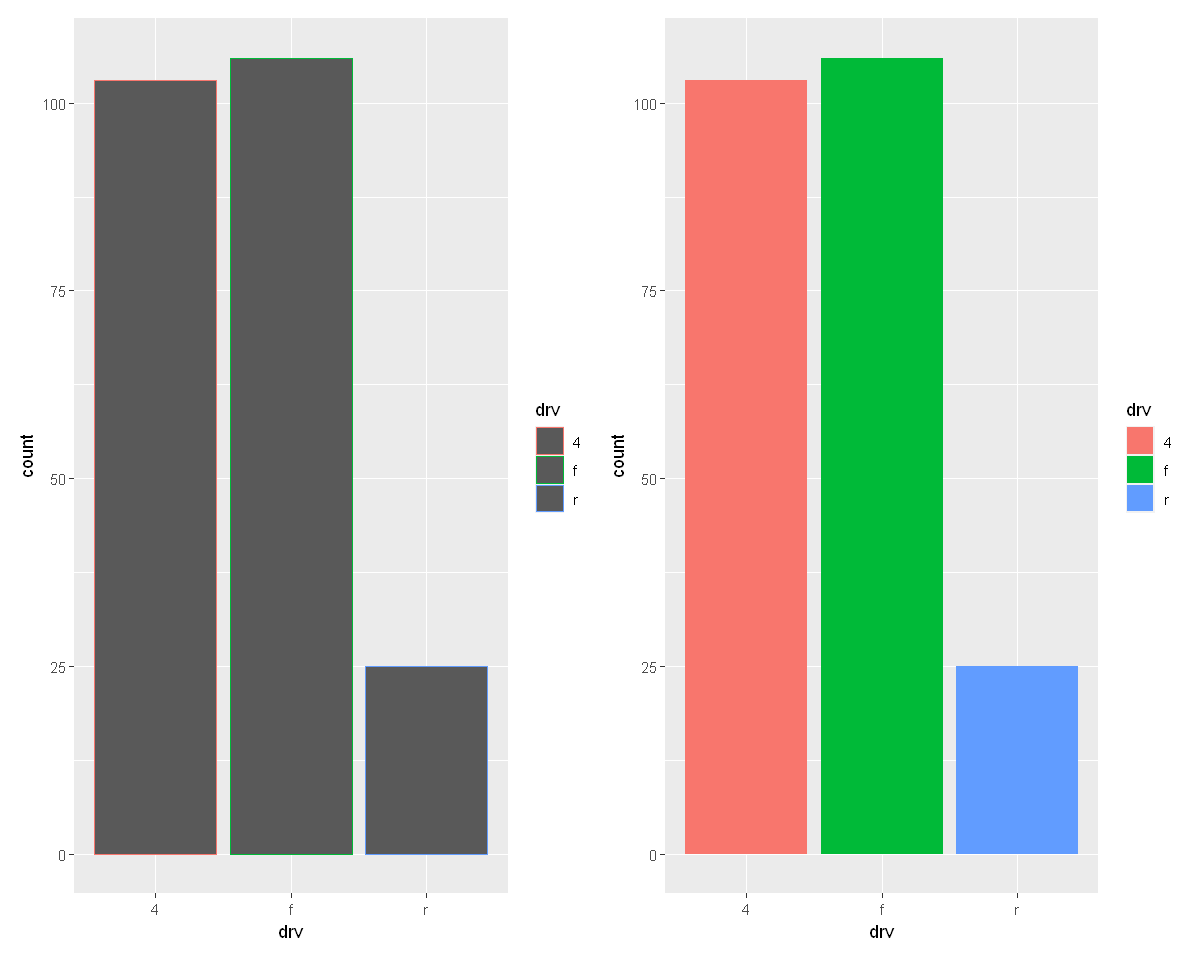

In [24]:
# to color of to fill
p1 = ggplot(mpg, aes(x = drv, color =  drv)) +
    geom_bar()

p2 = ggplot(mpg, aes(x = drv, fill = drv)) +
    geom_bar()

p1 + p2

Can we fill aesthetic to another variable? So that we can get a combination of `drv` and `class` in each bar

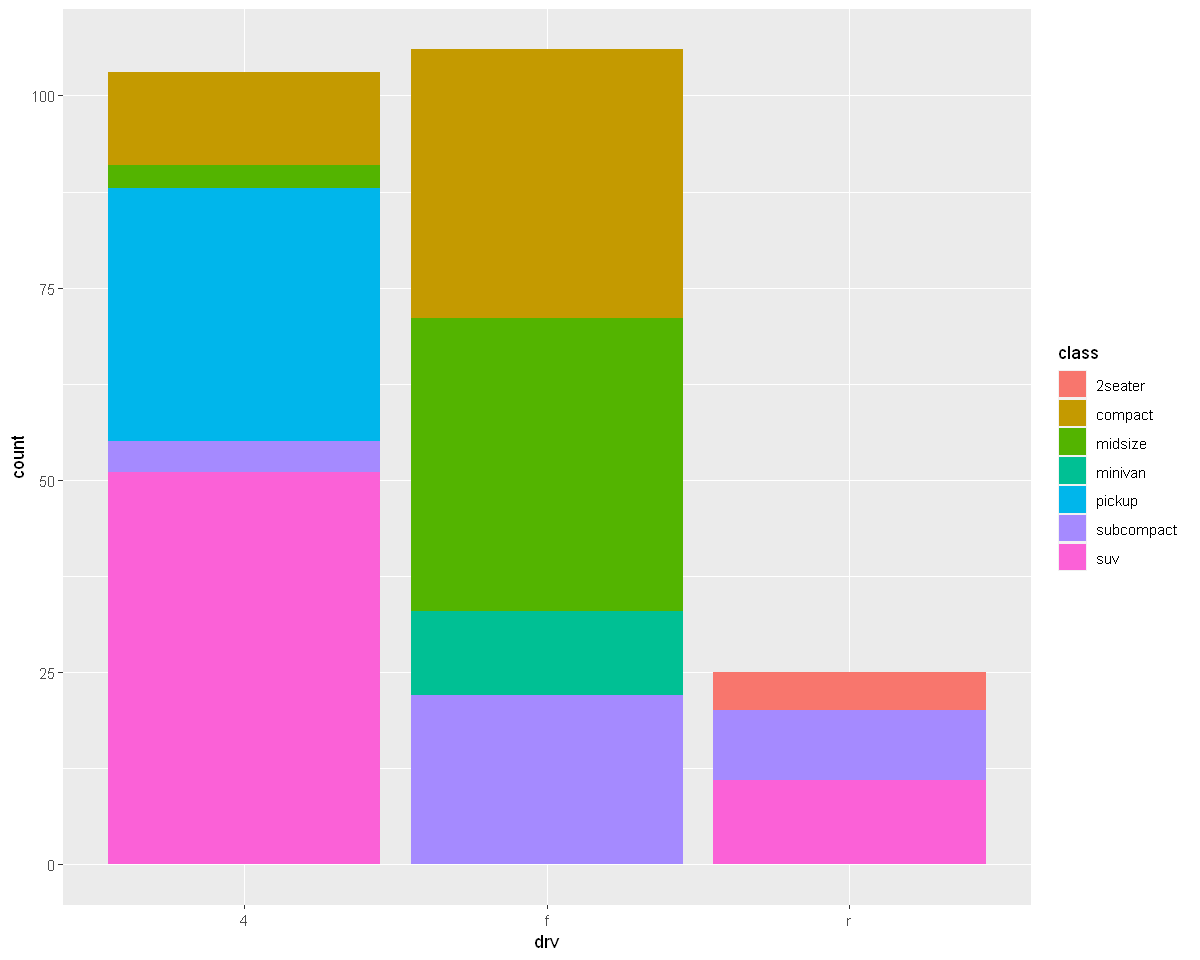

In [25]:
ggplot(mpg, aes(x = drv, fill = class)) +
    geom_bar()

Let's explore some different ways to display the above plot. We will be working on some design aspects.

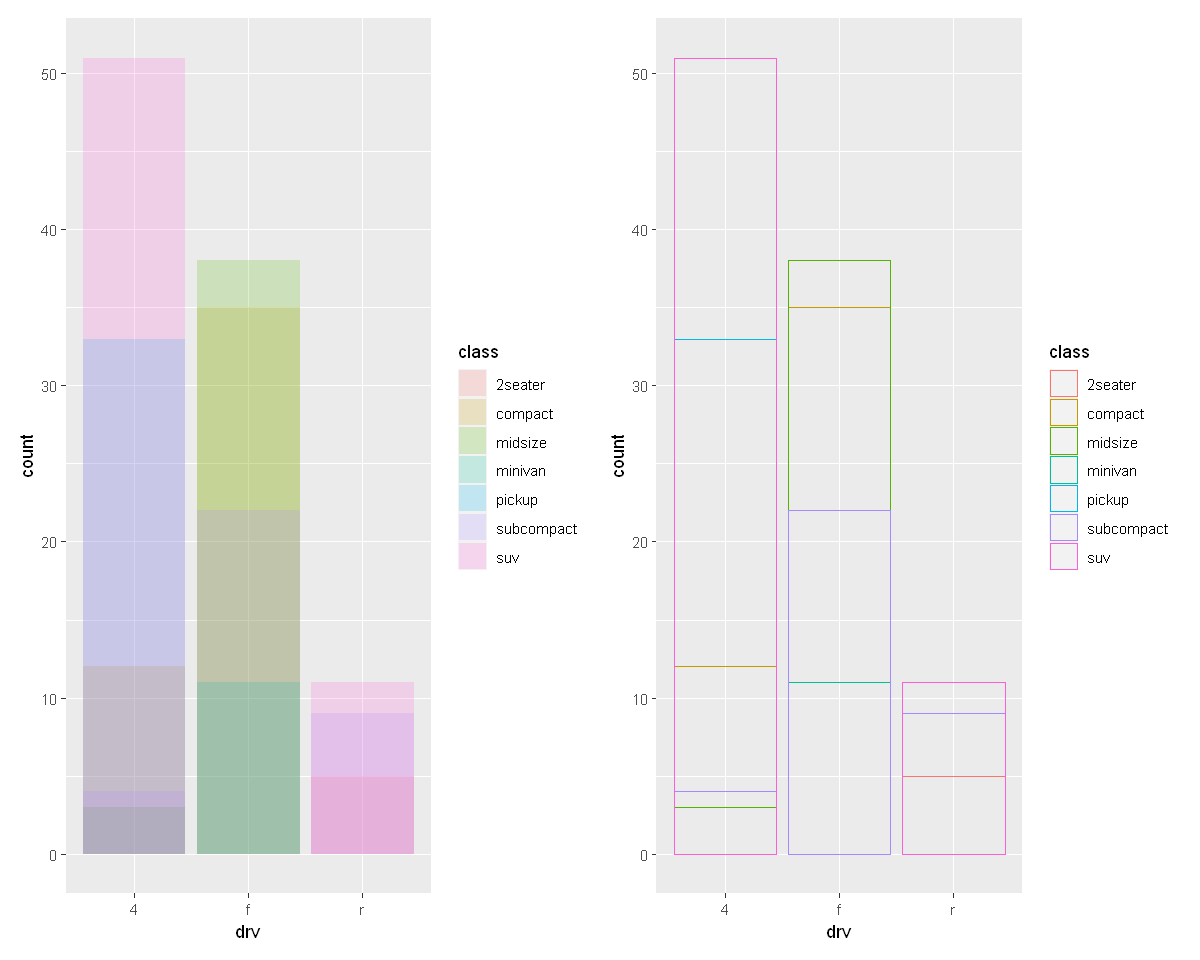

In [27]:
p1 = ggplot(mpg, aes(x = drv, fill = class)) +
    geom_bar(alpha = 1/5, position = "identity") # change the intensity of the color

p2 = ggplot(mpg, aes(x = drv, color = class)) +
    geom_bar(fill = NA, position = "identity") # remove the fill

p1 + p2

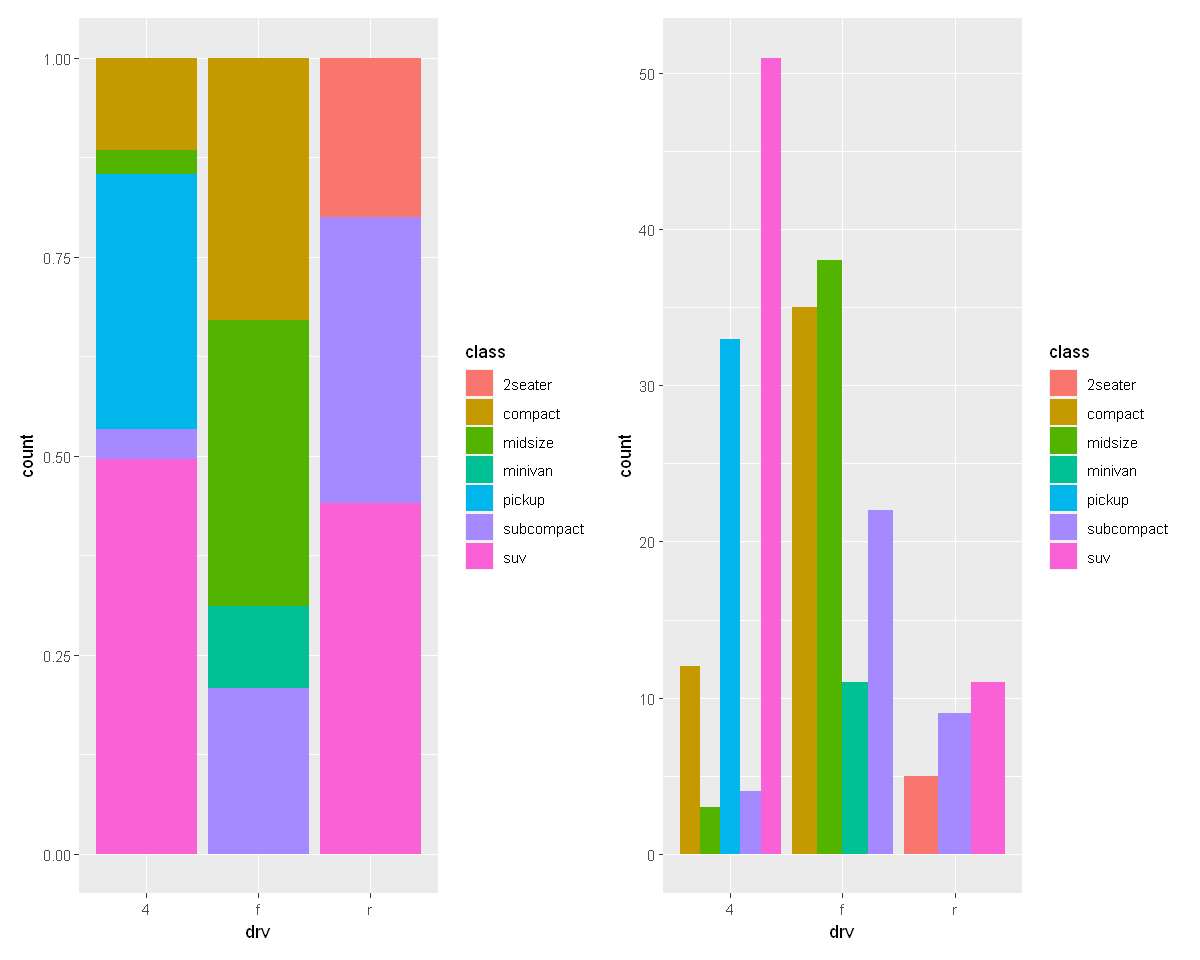

In [28]:
p1 = ggplot(mpg, aes(x = drv, fill = class)) +
    geom_bar(position = "fill") # stack to the same height

p2 = ggplot(mpg, aes(x = drv, fill = class)) +
    geom_bar(position = "dodge") # put side by side

p1 + p2

For the below plot, the points appear on a grid and many points overlap each other. This is a problem known as overplotting and such arrangement make it difficult to see the data distribution. 

We can add position adjustment with `jitter` to add a small amount of random noise to each data point so no two points are likely to receive the same amount of random noise. 

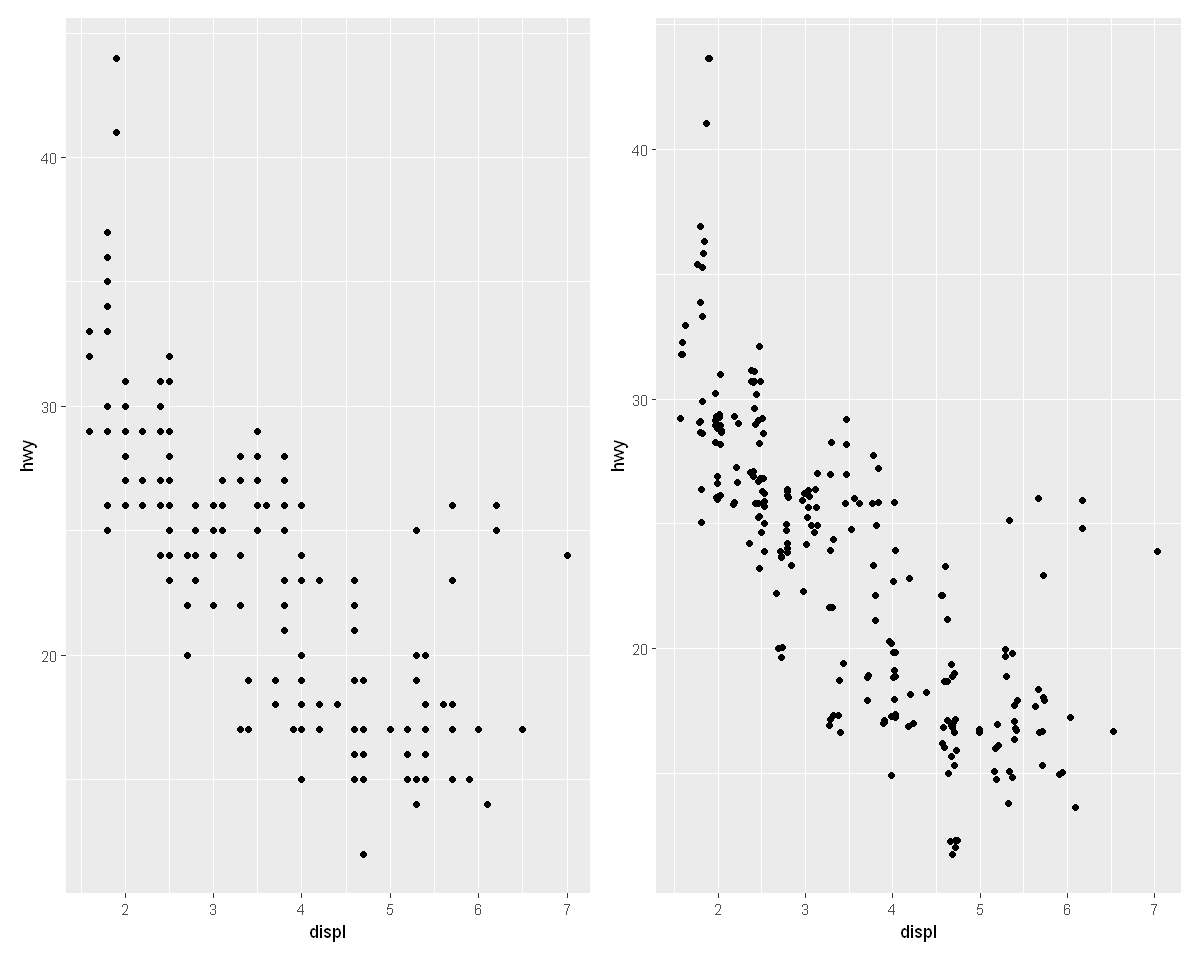

In [29]:
p1 = ggplot(mpg, aes(x = displ, y = hwy)) + 
    geom_point()

p2 = ggplot(mpg, aes(x = displ, y = hwy)) + 
    geom_point(position = "jitter")

p1 + p2

## Coordinate Systems

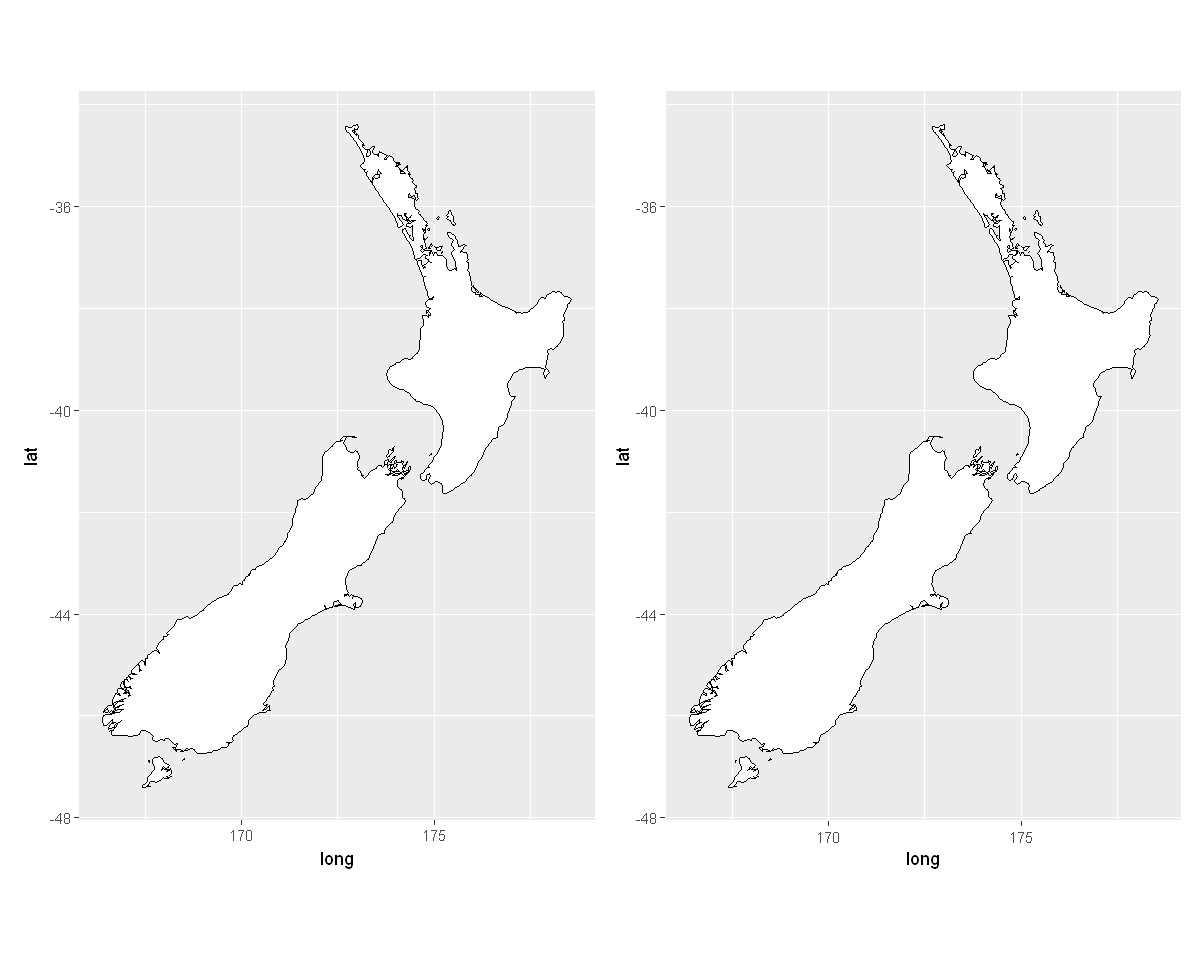

In [30]:
nz = map_data("nz")

p1 = ggplot(nz, aes(x = long, y = lat, group = group)) +
    geom_polygon(fill = "white", color = 'black')

p2 =  ggplot(nz, aes(x = long, y = lat, group = group)) +
    geom_polygon(fill = "white", color = 'black') +
    coord_quickmap()

p1 + p2

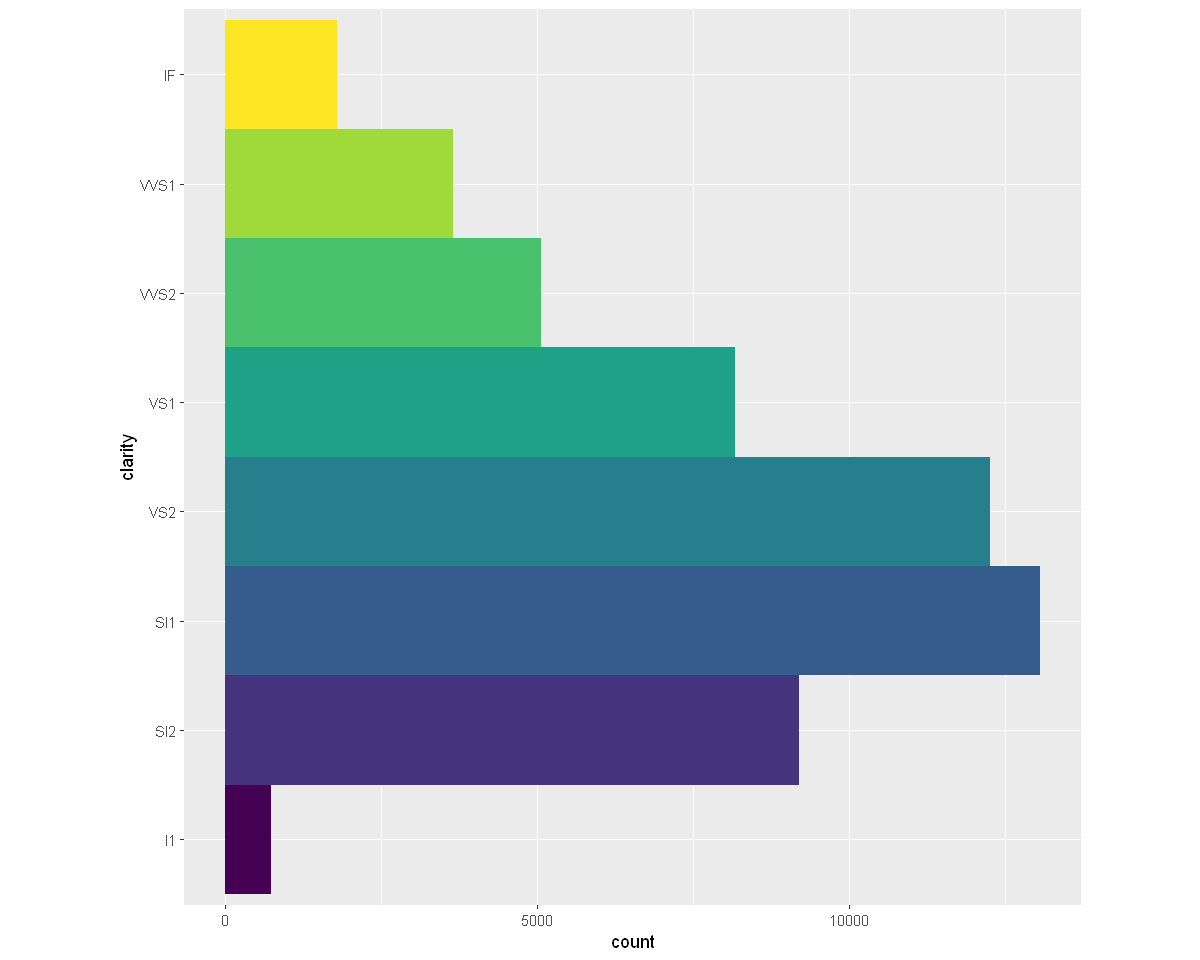

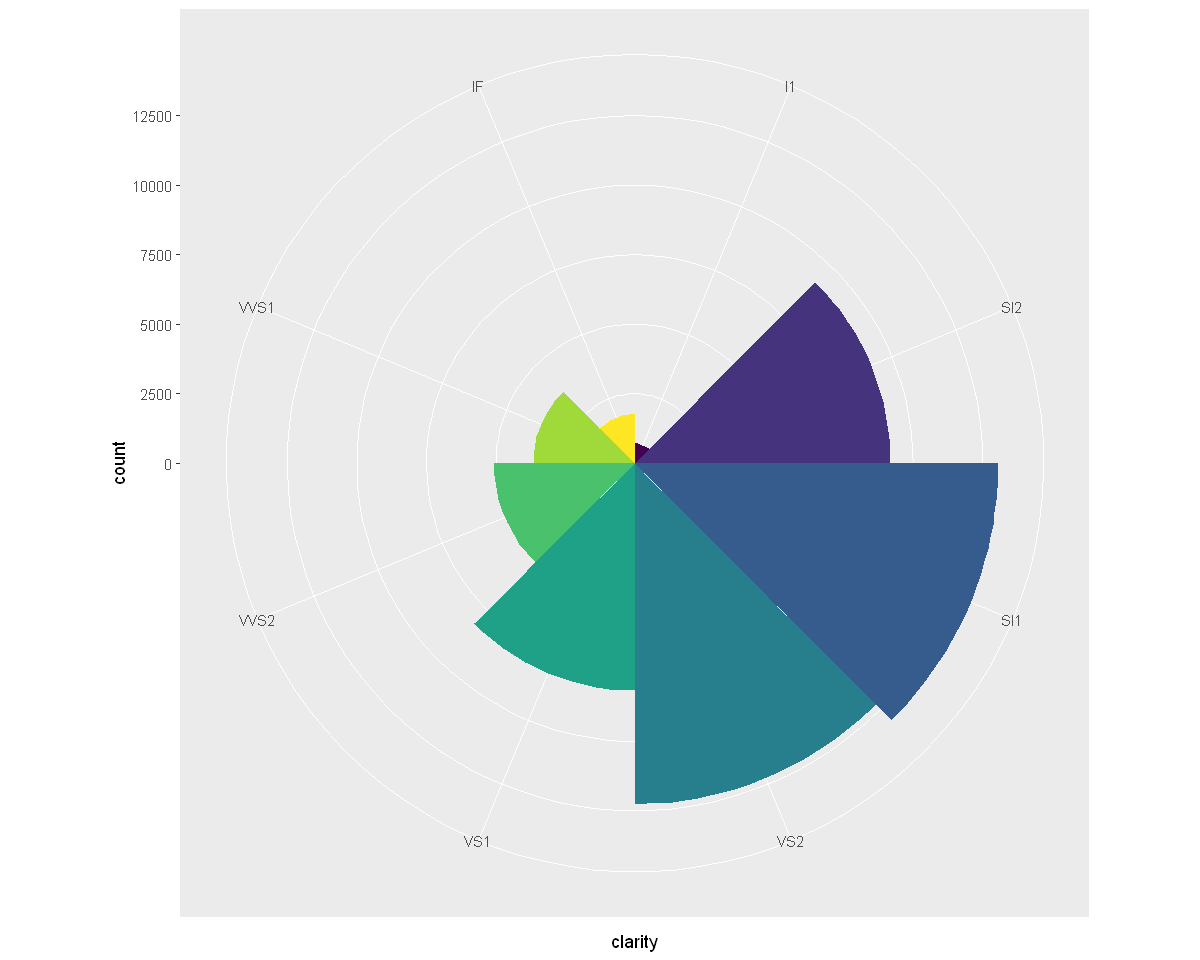

In [31]:
bar = ggplot(data = diamonds) +
    geom_bar(
        mapping = aes(x = clarity, fill = clarity),
        show.legend = FALSE,
        width = 1
    ) +
    theme(aspect.ratio = 1)

bar + coord_flip()
bar + coord_polar()